In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

In [2]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
#part1_scatter()

In [3]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    result = np.zeros((4,100))
    for i, degree in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        result[i:] = y
    return result

<IPython.core.display.Javascript object>


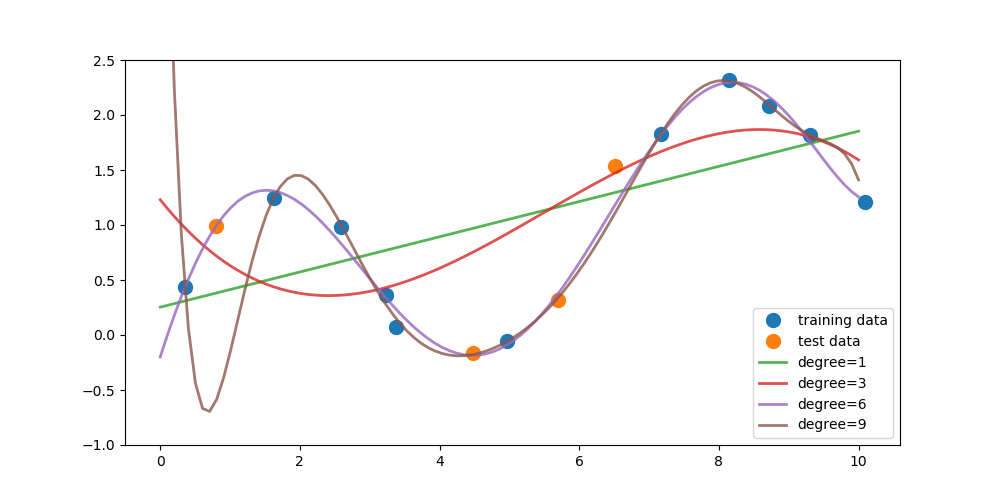

In [4]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
plot_one(answer_one())

In [5]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    R2_train = np.zeros(10)
    R2_test = np.zeros(10)
    
    for degree in range(0,10):
        oly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        R2_train[degree] = linreg.score(X_poly, y_train)
        
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        R2_test[degree] = linreg.score(X_test_poly,y_test)

    return (R2_train,R2_test)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score

R2_train = np.zeros(10)
R2_test = np.zeros(10)
for degree in range(10):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(11,1))
    linreg = LinearRegression().fit(X_poly, y_train)
    R2_train[degree] = linreg.score(X_poly, y_train)
      
    X_test_poly = poly.fit_transform(X_test.reshape(4,1))
    R2_test[degree] = linreg.score(X_test_poly,y_test)

R2_train

/home/kevin/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706])

In [7]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    # Your code here
    for i in range(10):
        poly = PolynomialFeatures(degree=i)
        
        # Train and score x_train
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)        
        r2_train[i] = linreg.score(X_poly, y_train);
        
        # Score x_test (do not train)
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = linreg.score(X_test_poly, y_test)
        
    return (r2_train, r2_test)# Your answer here

In [8]:
def answer_three():
    
    r2_scores = answer_two()
    df = pd.DataFrame({'training_score':r2_scores[0], 'test_score':r2_scores[1]})
    df['diff'] = df['training_score'] - df['test_score']
    
    df = df.sort(['diff'])
    good_gen = df.index[0]
    
    df = df.sort(['diff'], ascending = False)
    overfitting = df.index[0]
    
    df = df.sort(['training_score'])
    underfitting = df.index[0]
    
    return (underfitting,overfitting,good_gen)

In [9]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    poly = PolynomialFeatures(degree=12)
    X_poly = poly.fit_transform(X_train.reshape(11,1))
    X_test_poly = poly.fit_transform(X_test.reshape(4,1))
    
    #lineal regresion
    lineal = LinearRegression().fit(X_poly, y_train)
    r2_lineal = lineal.score(X_test_poly, y_test)
    
    #lineal Lasso
    linelasso = Lasso(alpha= 0.01, max_iter = 10000).fit(X_poly, y_train)
    r2_lasso = linelasso.score(X_test_poly,y_test)
    
    return (r2_lineal,r2_lasso)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Excersice 5

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
df = pd.DataFrame({'feature':X_train2.columns.values, 'feature importance':tree_clf.feature_importances_})
df.sort_values(['feature importance'],ascending=0)['feature'].head(5).tolist()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Excersice 6

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
    
# RBF kernel and C=1 are default anyway.
param_range = np.logspace(-4,1,6)
train_scores, test_scores = validation_curve(SVC(random_state=0),X_subset,y_subset,param_name='gamma',param_range=param_range)
    
# Finds row-wise mean (i.e mean across column values).
np.array(list(map(np.mean,train_scores))),np.array(list(map(np.mean,test_scores)))

(array([0.83370474, 0.93943926, 0.99101417, 1.        , 1.        ,
        1.        ]),
 array([0.83160092, 0.93747958, 0.9901502 , 1.        , 0.99852459,
        0.52240229]))